#第4章 リストとタプル

##リスト
  多言語では、配列と呼ぶ
  ひとまとまりのデータをまとめて保持し、処理することができる。

In [ ]:
a=[1,2,3]

In [ ]:
a

[1, 2, 3]

In [ ]:
a[0]

1

In [ ]:
b=[[1,2],[3,4],5]

In [ ]:
b[0]

[1, 2]

In [ ]:
b[0][1]

2

In [ ]:
[1,2]+[3,4,5]

[1, 2, 3, 4, 5]

In [ ]:
c=[1,2]
c.append(3)
c

[1, 2, 3]

In [ ]:
d=[]
e=[1,2]
d.append(e)
d.append(e)

In [ ]:
d

[[1, 2], [1, 2]]

In [ ]:
d[0][0]=4

In [ ]:
d

[[4, 2], [4, 2]]

In [ ]:
f=["A","B","C"]
for i in f:
  print(i)

A
B
C


## タプル
  複数の値の組を表現するデータ構造
  カンマで区切られた値で表現され、紛らわしい際は()を使用する

In [ ]:
a=1,2,3
a

(1, 2, 3)

In [ ]:
a[0]

1

In [ ]:
(1,2)+(3,4)

(1, 2, 3, 4)

In [ ]:
b=(1,2,3)
b[1]=4

TypeError: ignored

一度作成されたタプルは修正不可

In [ ]:
def func():
  return 1,2

func()

(1, 2)

In [ ]:
c,d=1,2
c
d

2

In [ ]:
c

1

複数の変数を初期化できる

In [ ]:
c,d=d,c

In [ ]:
c

2

In [ ]:
d

1

置換も可能

In [ ]:
f=[(1,2),(3,4)]

In [ ]:
f

[(1, 2), (3, 4)]

タプルのリストも可能

## Enumerate
  for i in a:とあった場合に、「要素の値」と「その要素が何番目なのか」という2つの情報が必要な際に使用することができる。

In [ ]:
a=["A","B","C"]
for i,x in enumerate(a):
  print(i,x)

0 A
1 B
2 C


## リスト内表記
  [新しいリストの要素 for 元のリストの要素 in 元のリスト]という書き方ができる。
  


In [ ]:
source=[0,1,2]
result=[]
for i in source:
  result.append(i*2)
result

[0, 2, 4]

In [ ]:
source=[0,1,2]
result=[2*i for i in source]
result

[0, 2, 4]

## コッホ曲線
  コッホ曲線とは、以下の手順で作成される
1.   線分を用意する
2.   線分を3等分する
3.   中央の線分を正三角形の形に盛り上げる
  <br>というようにこれらを再帰することで成り立つ

### ライブラリのインポート

In [ ]:
from math import sqrt
from PIL import Image, ImageDraw

### ベクトル和の長さ




In [ ]:
def length(a):
  x,y=0,0
  for (dx, dy) in a:
    x+=dx
    y+=dy
  return sqrt(x**2+y**2)

### タプルからリストを作成

In [ ]:
def convert(a,b):
  ax,ay=a
  alen=sqrt(ax**2+ay**2)
  c=ax/alen
  s=ay/alen
  scale=alen/length(b)
  b=[(scale*x,scale*y)for (x,y) in b]
  b=[(c*x-s*y,s*x+c*y)for (x,y) in b]
  return b


In [ ]:
a=(0,1)
b=[(1,1),(1,-1)]
convert(a,b)

[(-0.5, 0.5), (0.5, 0.5)]

### タプルのリストそれぞれに適用

In [ ]:
def apply(a,b):
  r=[]
  for i in a:
    r+=convert(i,b)
  return r

In [ ]:
a=[(1,0),(0,-1)]
b=[(1,1),(1,-1)]
apply(a,b)

[(0.5, 0.5), (0.5, -0.5), (0.5, -0.5), (-0.5, -0.5)]

### 線の描画

In [ ]:
def draw_line(draw,a,size):
  x1,y1=0,0
  for (dx,dy)in a:
    x2=x1+dx
    y2=y1+dy
    draw.line((x1,size/2-y1,x2,size/2-y2),fill=(255,255,255))
    x1,y1=x2,y2

### 画像の表示

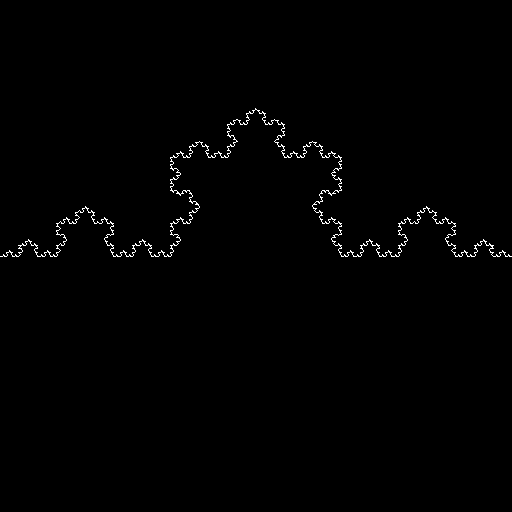

In [ ]:
size=512
N=5
img=Image.new("RGB",(size,size))
draw=ImageDraw.Draw(img)
a=[(size,0)]
b=[(1,0),(0.5,sqrt(3.0)/2),(0.5,-sqrt(3.0)/2),(1,0)]
for _ in range(N):
  a=apply(a,b)
draw_line(draw,a,size)
img

## オリジナルのフラクタル曲線

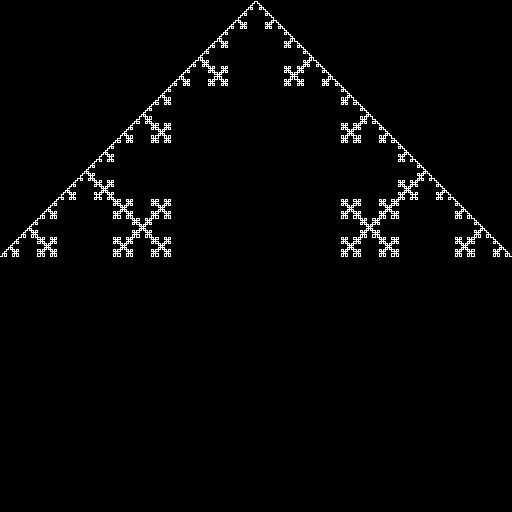

In [ ]:
size=512
N=5
img=Image.new("RGB",(size,size))
draw=ImageDraw.Draw(img)
a=[(size,0)]
b=[(1,0),(0,1),(1,0),(0,-1),(1,0)]
for _ in range(N):
  a=apply(a,b)
draw_line(draw,a,size)
img

## 色付きフラクタル曲線


In [ ]:
def draw_line_color(draw,a,colors,size):
  x1,y1=0,0
  for i,(dx,dy)in enumerate(a):
    x2=x1+dx
    y2=y1+dy
    c=colors[i%3]
    draw.line((x1,size/2-y1,x2,size/2-y2),fill=c)
    x1,y1=x2,y2

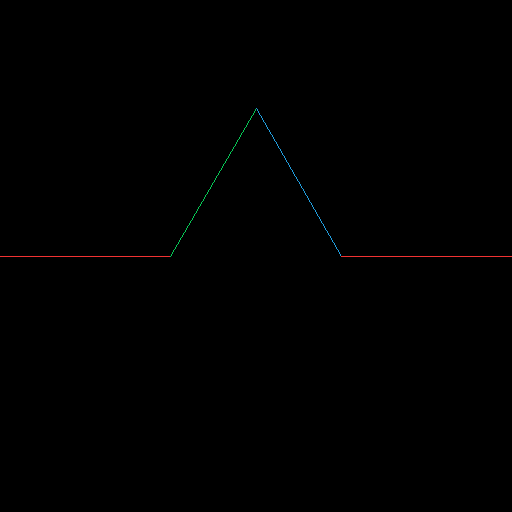

In [ ]:
size=512
N=1
img=Image.new("RGB",(size,size))
draw=ImageDraw.Draw(img)
a=[(size,0)]
b=[(1,0),(0.5,sqrt(3.0)/2),(0.5,-sqrt(3.0)/2),(1,0)]
c=[(241,50,50),(6,199,85),(33,157,221)]
for _ in range(N):
  a=apply(a,b)
draw_line_color(draw,a,c,size)
img

## 内包表記

In [ ]:
def convert(a,b):
  ax,ay=a
  alen=sqrt(ax**2+ay**2)
  c=ax/alen
  s=ay/alen
  scale=alen/length(b)
  b=[(scale*x,scale*y) for (x,y) in b]
  b=[(c*x-s*y,s*x+c*y) for (x,y) in b]
  return b

内包表記を行わない場合、以下のように記述される

```
r=[]
for (bx,by) in b:
  bx*=scale
  by*=scale
  nx=c*bx-s*by
  ny=s*bx+c*by
  r.append((nx,ny))
return r
```



# 課題:素数判定

問題：以下のプログラムを穴埋めを行い，適切な出力結果を表示せよ。

＜与えられた整数のリストが素数か素数で無いかを判定し，結果を表示する。＞

※注意事項

・main関数内で指定したデータリストが素数であるかの判定は，judge関数内で行うこと。

・judge関数では，prime関数で作成された素数のリストを使用して素数の判定を行うこと。

In [1]:
#関数prime 素数のリストを作成する。
#参考：https://ictsr4.com/py/m0130.html

def prime(limit):
    prime = []                                  #素数のリスト
    for i in range(2,limit):                    #2～limitまでの数に対してfor
        for j in range(2, int(limit**0.5)+1):
            if i % j == 0:                      #素数でなければ次の数字へ
                break
        else:
            prime.append(i)                     #素数だったらprimeに追加して次の数字へ

    return prime

In [4]:
#関数judge 素数かどうかの結果リストを作成する。

def judge(d1,d2):

  answer = []                   #解答保管用リスト（mainに返す）
  p_num_list = prime(20)        #素数のリスト，()の数字までの素数のリストが入る
                                #関数primeにて素数のリストを作成する
  for i in d2:                  #for・if文で与えられたデータが素数のリストに含まれているか判別する
    if i in p_num_list:
      answer.append(data1[0])      #"素数"を格納
    else:
      answer.append(data1[1])      #"素数ではない"を格納

  return answer

In [5]:
#mainのブロック

data1 = ["素数","素数ではない"] #テキスト
data2 = [4,9,11,15,17]          #データリスト
p_number = []                   #結果の解答を入れるリスト

p_number = judge(data1,data2)   #素数かどうかの判別を行った結果を代入

print(data2)                    #結果の表示（数字データ）
print(p_number)                 #結果の表示（テキストの解答）

[4, 9, 11, 15, 17]
['素数ではない', '素数ではない', '素数', '素数ではない', '素数']
